In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rajvamsi","key":"8a174b07ed036b606c1cd386c1f7fcfb"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d msambare/fer2013

 98% 59.0M/60.3M [00:00<00:00, 124MB/s]
100% 60.3M/60.3M [00:00<00:00, 135MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "fer2013.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
from google.colab import files
files.upload()

Saving images.zip to images.zip


{'images.zip': b'PK\x03\x04\n\x00\x00\x00\x00\x00T\x80\x86R\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x07\x00\x00\x00images/PK\x03\x04\x14\x00\x00\x00\x08\x00OHlQk\x9c"\'\xbb\x1a\x01\x00"\x1b\x01\x00\x10\x00\x00\x00images/angry.png4\xbd\x03\x90d\xcf\xd35\xdcc\xdb\xb6m\xdb\xb6m\xdb3;\xb6m[;\xdc\xb1mk\xc7\xb6m|\xfb\xfb\xbf\xdf\xd3\x117:\xa2o\xc4\xad\xca\x93Y\x95y\xaaO\xd5\x8dT\x94\x97\x80\x83\xc6\x86\x06\x00\x00pR\x92\xa2\xca\x00\x00P\xc2\x7f\x17$\xf8\xbf_\x02z\xd9\xa7\x00\x00B\x80\x94\xa8\x90\xaa\xa7\xfe\xa5\x1eD\x0e\x9e\xd8\xd7\xcf\xd1\xb9\x8f\xc7\xcd\xf6SR^B\x08\xb2\xb07d7(\xe8Ya1*\x90\x15:(hI\x85\xbf\x98"\x10\x92\x18"\x92\x90\xa8`\x14j\xa9\x08%0\x11\x90l\x80"JP\x89\x9esw\xd7\x05\x9d\xc7\xcf\xac\x87\xbb\x85\x87\xbb{K\x97\xc7\x95\x9e=\x04\xfd\xcd\xf5\xd5\xe5\x7f\x9f_\'\x7f{z\x99\x9ac\x1b\xf8\xa1\xa3. \xa7\xb2\xd9\xa2[R\x1c\n\x1f\x9b`\xa9\xc7i\x94V\xae\xb6\xb7\xe5\xf0r\xaf\x96\xb6\x97\xe5\xb7\xf8\xb6Z\xb8\xb5\xf6l;\x8e)\x04\xca\xc4|\xe8\x8bB\xa3\x9fK2U\xdc\xcb\x1e\x9b\\\xa5\xe5\xe

In [ ]:
from zipfile import ZipFile
file_name = "images.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D 
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = 'train'
val_dir = 'test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')
validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

epochs = 10

In [ ]:
emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])

In [ ]:
history = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 1024,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=7178 // 1024)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
28/28 [==============================] - 23s 835ms/step - loss: 1.8235 - accuracy: 0.2673 - val_loss: 1.8184 - val_accuracy: 0.2701
Epoch 2/10
28/28 [==============================] - 24s 845ms/step - loss: 1.8405 - accuracy: 0.2349 - val_loss: 1.8492 - val_accuracy: 0.2433
Epoch 3/10
28/28 [==============================] - 23s 837ms/step - loss: 1.8397 - accuracy: 0.2316 - val_loss: 1.8288 - val_accuracy: 0.2902
Epoch 4/10
28/28 [==============================] - 24s 847ms/step - loss: 1.8345 - accuracy: 0.2439 - val_loss: 1.8274 - val_accuracy: 0.2522
Epoch 5/10
28/28 [==============================] - 24s 847ms/step - loss: 1.8231 - accuracy: 0.2388 - val_loss: 1.8215 - val_accuracy: 0.2455
Epoch 6/10
28/28 [==============================] - 24s 853ms/step - loss: 1.8308 - accuracy: 0.2528 - val_loss: 1.8365 - val_accuracy: 0.2634
Epoch 7/10
28/28 [==============================] - 24s 858ms/step - loss: 1.8164 - accuracy: 0.2533 - val_loss: 1.8396 - val_accuracy: 0.2232

In [ ]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
xc=range(epochs)

In [ ]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

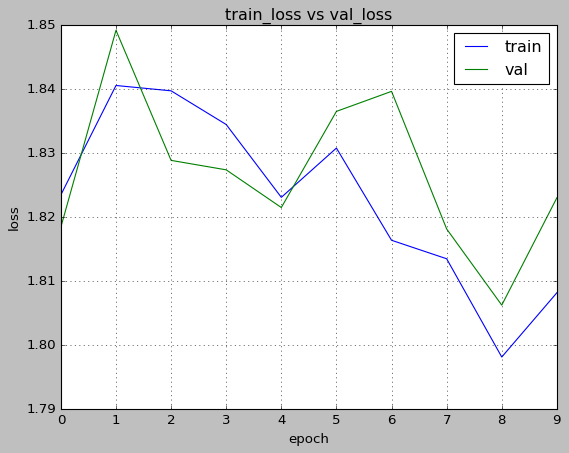

In [ ]:
import matplotlib.pyplot as plt


plt.plot(xc,history.history['loss'])
plt.plot(xc,history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
plt.show()


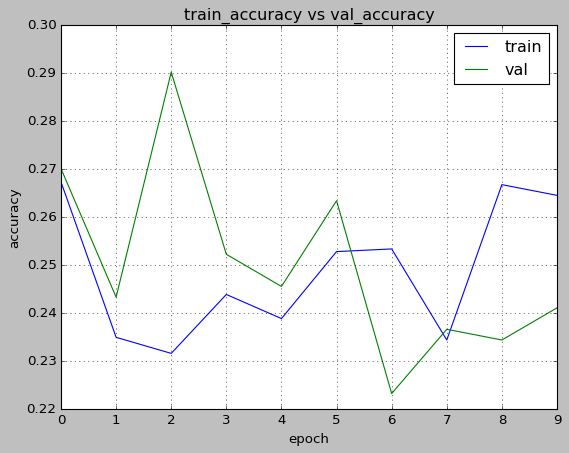

In [ ]:
import matplotlib.pyplot as plt


plt.plot(xc,history.history['accuracy'])
plt.plot(xc,history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('train_accuracy vs val_accuracy')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
plt.show()